<a href="https://colab.research.google.com/github/Steel3264/AI/blob/main/AI_W7_17_03_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd 
url = 'mtcars.csv'
data = pd.read_csv(url)
data.head()

,Unnamed: 0,mpg,disp,hp,wt
0,Mazda RX4,21.0,160.0,110,2.620
1,Mazda RX4 Wag,21.0,160.0,110,2.875
2,Datsun 710,22.8,108.0,93,2.320
3,Hornet 4 Drive,21.4,258.0,110,3.215
4,Hornet Sportabout,18.7,360.0,175,3.440


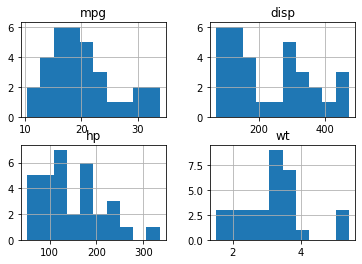

In [62]:
import matplotlib.pyplot as plt 
data.hist()   # khổ phân bố dữ liệu 
plt.show()

In [6]:
correlation = data.corr()
print(correlation)

           mpg      disp        hp        wt
mpg   1.000000 -0.847551 -0.776168 -0.867659
disp -0.847551  1.000000  0.790949  0.887980
hp   -0.776168  0.790949  1.000000  0.658748
wt   -0.867659  0.887980  0.658748  1.000000


<Axes: >

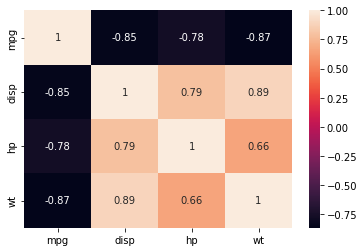

In [7]:
import seaborn as sns 
sns.heatmap(correlation, annot=True ) #màu càng đậm giá trị càng thấp 

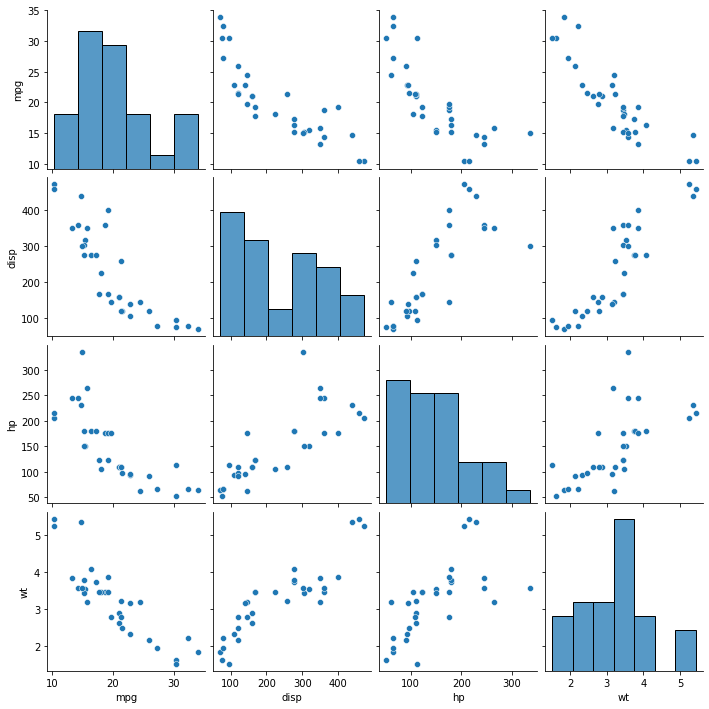

In [8]:
sns.pairplot(data) 

In [74]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X=pd.DataFrame(data['wt']), 
          y=data['mpg'])
print('Hệ số intercept là: ', model.intercept_)
print('Hệ số coeffient là: ', model.coef_)

#pt hồi quy 
 # (mpg = -5,344wt+37,285)
 #độ chính xác 
model.score(X=pd.DataFrame(data['wt']), y=data['mpg'])
y_pred = model.predict(X = pd.DataFrame(data['wt']))
print(y_pred)





Hệ số intercept là:  37.28512616734204
Hệ số coeffient là:  [-5.34447157]
[23.28261065 21.9197704  24.88595212 20.10265006 18.90014396 18.79325453
 18.20536265 20.23626185 20.45004071 18.90014396 18.90014396 15.53312687
 17.3502472  17.08302362  9.22665041  8.29671236  8.71892561 25.52728871
 28.65380458 27.47802083 24.11100374 18.47258623 18.92686632 16.76235533
 16.73563297 26.94357367 25.847957   29.19894068 20.34315128 22.48093991
 18.20536265 22.4274952 ]


In [23]:
#Bac 2
model = linear_model.LinearRegression()
x = pd.DataFrame([data['wt'], data['wt']**2]).T
y=data['mpg']
model.fit(X,y=data['mpg'])
print('Intecept của mô hình: ', model.intercept_)
print('Coeffient của mô hình: ', model.coef_)
print('Độ chính xác của mô hình: ', model.score(x,y))

#pt hồi quy là: 
# (-13.38wt + 1.17wt^2 + 49.93)

Intecept của mô hình:  49.93081094945181
Coeffient của mô hình:  [-13.38033708   1.17108689]
Độ chính xác của mô hình:  0.8190613581384094


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


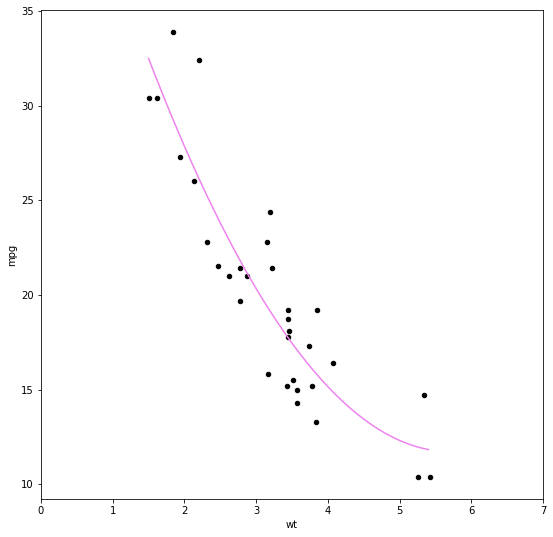

In [43]:
import numpy as np
range = np.arange(1.5, 5.5, 0.1)
x_range=pd.DataFrame([range,range**2]).T 
y_pred = model.predict(X=x_range)
data.plot(kind = 'scatter', x='wt', 
          y = 'mpg', figsize = (9,9), color = 'black',
          xlim = (0,7))
plt.plot(range, y_pred, color = 'violet')


In [47]:
#Bac 10
model = linear_model.LinearRegression()
X = pd.DataFrame([data['wt'], data['wt']**1, data['wt']**2,  data['wt']**3,  data['wt']**4,  data['wt']**5,  data['wt']**6, data['wt']**7, data['wt']**8, data['wt']**9, data['wt']**10]).T
y=data['mpg']

model.fit(X,y=data['mpg'])
print('Intecept của mô hình: ', model.intercept_)
print('Coeffient của mô hình: ', model.coef_)
print('Độ chính xác của mô hình: ', model.score(X,y))


Intecept của mô hình:  -14921.120810791104
Coeffient của mô hình:  [ 3.22906711e+04  3.22906848e+04 -1.20086131e+05  1.26931928e+05
 -8.46598456e+04  3.73155199e+04 -1.10334755e+04  2.16590405e+03
 -2.70730545e+02  1.94974162e+01 -6.15515437e-01]
Độ chính xác của mô hình:  0.8702106606279609


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


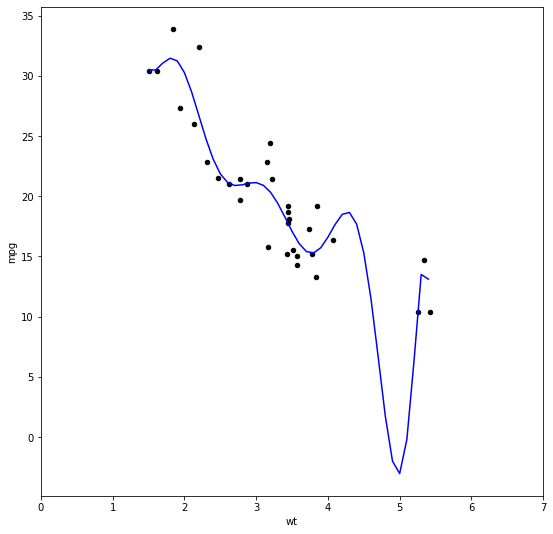

In [46]:
import numpy as np
range = np.arange(1.5, 5.5, 0.1)
X_range=pd.DataFrame([range,range**1,range**2,range**3,range**4,range**5,range**6,range**7,range**8,range**9,range**10]).T 
y_pred = model.predict(X=X_range)
data.plot(kind = 'scatter', x='wt', 
          y = 'mpg', figsize = (9,9), color = 'black',
          xlim = (0,7))
plt.plot(range, y_pred, color = 'blue')

In [63]:
# đa thức nhiều biến 

model = linear_model.LinearRegression()
model.fit(X=data.loc[:,['wt','hp',"disp"]], y=data['mpg'])
X=data.loc[:,['wt','hp','disp']]
y=data['mpg']

print('Intercept là: ', model.intercept_)
print('coeficient là: ', model.coef_)
print('Độ chính xác là: ', model.score(X,y))

# (mpg=-3.87wt-0.031hp+37.22)


Intercept là:  37.10550526903184
coeficient là:  [-3.80089058e+00 -3.11565508e-02 -9.37009081e-04]
Độ chính xác là:  0.8268361424946447


In [123]:
#50_Startups.csv
import pandas as pd 
url = '50_Startups.csv'
data = pd.read_csv(url)
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


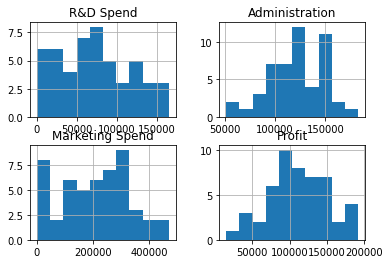

In [124]:
import matplotlib.pyplot as plt 
data.hist()   # khổ phân bố dữ liệu 
plt.show()

In [125]:
correlation = data.corr()
print(correlation)

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


<Axes: >

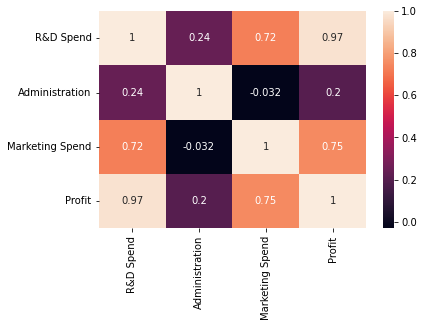

In [126]:
import seaborn as sns 
sns.heatmap(correlation, annot=True ) #màu càng đậm giá trị càng thấp 

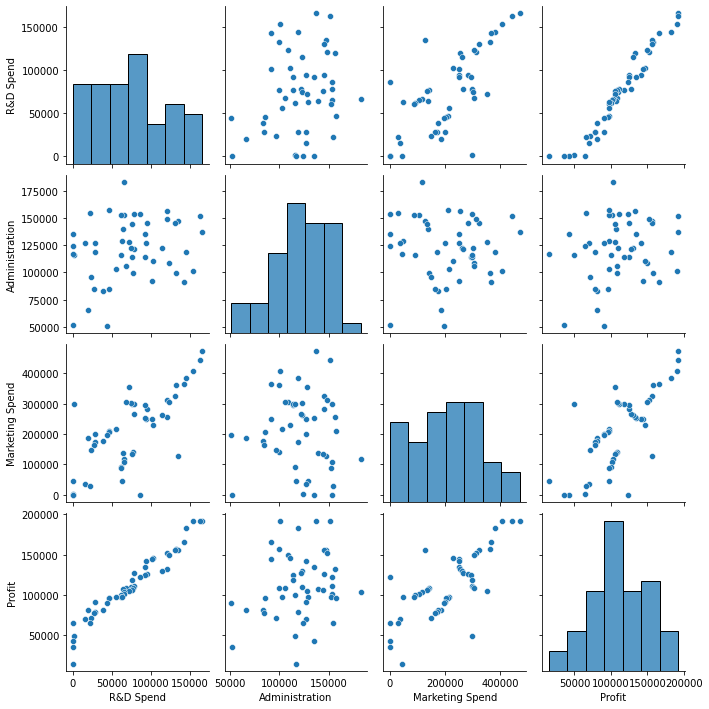

In [127]:
sns.pairplot(data) 

In [128]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X=pd.DataFrame(data['R&D Spend']), 
          y=data['Profit'])
print('Hệ số intercept là: ', model.intercept_)
print('Hệ số coeffient là: ', model.coef_)

#pt hồi quy 
 # ( Profit= 0.854R&D Spend + 49032.899)
 #độ chính xác 
model.score(X=pd.DataFrame(data['R&D Spend']), y=data['Profit'])
y_pred = model.predict(X = pd.DataFrame(data['R&D Spend']))
print(y_pred)

Hệ số intercept là:  49032.89914125215
Hệ số coeffient là:  [0.85429137]
[190289.29389289 187938.71118575 180116.65707807 172369.00320589
 170433.97345032 161694.19683741 164033.72501421 160345.46724972
 152011.33380847 154396.82286103 136096.36397105 135036.08586475
 129219.89081021 127621.20411029 151499.37407569 146869.43093301
 115678.82583435 129897.69412683 127413.41482014 122860.50313037
 114175.91374003 116000.34693472 112245.81324567 106725.35677792
 114850.93206678 104275.40289851 113385.70276482 110633.79960036
 105460.14271464 105079.09459155 101994.24845109 101261.18102569
 103202.54108032  96440.90176556  88694.29012885  88342.27936946
  73520.10196791  86681.47714396  66314.86331588  81973.10151051
  73597.47513738  72861.58000754  69229.14164122  62279.31048036
  67979.15105018  49887.38699921  50156.68526807  49032.89914125
  49495.96777887  49032.89914125]


In [129]:
#Bac 2
model = linear_model.LinearRegression()
x = pd.DataFrame([data['R&D Spend'], data['R&D Spend']**2]).T
y=data['Profit']
model.fit(x,y=data['Profit'])
print('Intecept của mô hình: ', model.intercept_)
print('Coeffient của mô hình: ', model.coef_)
print('Độ chính xác của mô hình: ', model.score(x,y))

#pt hồi quy là: 
# (8.9R&D Spend - 2.31R&D Spend^2 + 48128.14)

Intecept của mô hình:  48128.14916956878
Coeffient của mô hình:  [ 8.90147291e-01 -2.31821806e-07]
Độ chính xác của mô hình:  0.946703652909133


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


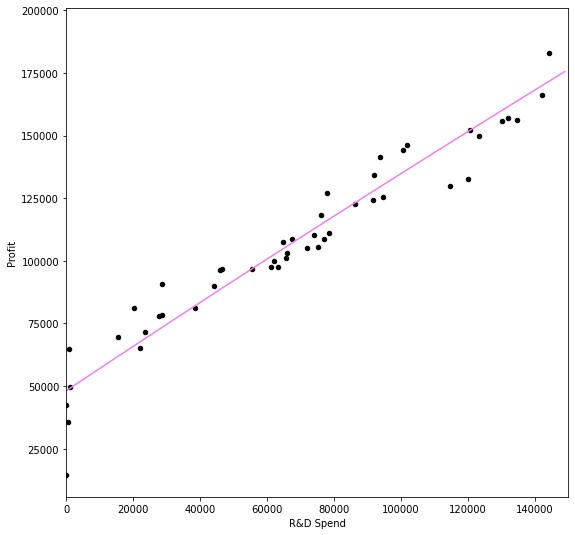

In [139]:
import numpy as np
range = np.arange(1.5, 150000, 1000)
x_range=pd.DataFrame([range,range**2]).T 
y_pred = model.predict(X=x_range)
data.plot(kind = 'scatter', x='R&D Spend', 
          y = 'Profit', figsize = (9,9), color = 'black',
          xlim = (0,150000))
plt.plot(range, y_pred, color = 'violet')

In [142]:
#Bac 10
model = linear_model.LinearRegression()
X = pd.DataFrame([data['R&D Spend'], data['R&D Spend']**1, data['R&D Spend']**2,  data['R&D Spend']**3,  data['R&D Spend']**4, 
                  data['R&D Spend']**5,  data['R&D Spend']**6, data['R&D Spend']**7, data['R&D Spend']**8, data['R&D Spend']**9, data['R&D Spend']**10]).T
y=data['Profit']

model.fit(X,y=data['Profit'])
print('Intecept của mô hình: ', model.intercept_)
print('Coeffient của mô hình: ', model.coef_)
print('Độ chính xác của mô hình: ', model.score(X,y))



Intecept của mô hình:  88222.34569239737
Coeffient của mô hình:  [ 5.51258430e-70 -1.73044283e-39 -4.21635448e-46  2.81055607e-71
  4.18132673e-55  7.14933108e-50  6.00188343e-45  4.22025492e-40
  1.99075982e-35 -2.43124784e-40  7.49857992e-46]
Độ chính xác của mô hình:  0.7054994430986505


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


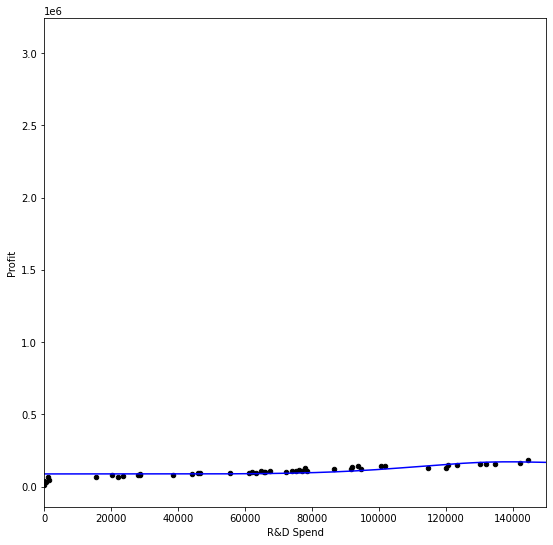

In [149]:
import numpy as np
range = np.arange(1.5, 200000, 1000)
X_range=pd.DataFrame([range,range**1,range**2,range**3,range**4,range**5,range**6,range**7,range**8,range**9,range**10]).T 
y_pred = model.predict(X=X_range)
data.plot(kind = 'scatter', x='R&D Spend', 
          y = 'Profit', figsize = (9,9), color = 'black',
          xlim = (0,150000)
          )
plt.plot(range, y_pred, color = 'blue')